In [2]:
!open .


In [1]:
!tree


.
├── data
│   └── blog.sqlite
├── exercice.ipynb
└── solution.ipynb

2 directories, 3 files


## 1. Récupération de la DB et schéma de base de donnée 


Récupérer la base de données `blog.sqlite`

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/blog.sqlite')


In [3]:
query = "SELECT * FROM sqlite_master"
pd.read_sql_query(query, conn)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,users,users,2,"CREATE TABLE users(\n id INTEGER PRIMARY KEY AUTOINCREMENT,\n first_name VARCHAR(20),\n last_name VARCHAR(20)\n )"
2,table,posts,posts,4,"CREATE TABLE posts(\n id INTEGER PRIMARY KEY AUTOINCREMENT,\n title TEXT,\n content TEXT,\n user_id INTEGER,\n FOREIGN KEY(user_id) REFERENCES users(id)\n )"
3,table,likes,likes,5,"CREATE TABLE likes(\n id INTEGER PRIMARY KEY AUTOINCREMENT,\n created_at TEXT,\n user_id INTEGER,\n post_id INTEGER,\n FOREIGN KEY(user_id) REFERENCES users(id),\n FOREIGN KEY(post_id) REFERENCES posts(id)\n )"


In [8]:
query = "SELECT * FROM sqlite_sequence"
pd.read_sql_query(query, conn)


,name,seq
0,users,100
1,posts,315
2,likes,10000


Réaliser un schéma de base de donnée (diagramme entité-relation (ERD)) à l'aide d'un outil, par exemple <a href='https://www.dbdesigner.net/' target="_blank">DB designer </a>

In [38]:
query = "SELECT * FROM users LIMIT 5"
pd.read_sql_query(query, conn)


,id,first_name,last_name
0,1,Cory,Bush
1,2,Craig,Good
2,3,Todd,Smith
3,4,Ashlee,Lee
4,5,Kyle,Johnson


In [37]:
query = "SELECT * FROM likes LIMIT 5"
pd.read_sql_query(query, conn)


,id,created_at,user_id,post_id
0,1,2019-01-17,24,54
1,2,2019-12-28,12,136
2,3,2019-06-06,40,84
3,4,2019-05-04,21,53
4,5,2019-11-11,16,89


In [39]:
query = "SELECT * FROM posts LIMIT 5"
pd.read_sql_query(query, conn)


,id,title,content,user_id
0,1,Feel help view real color.,Store theory hotel bar move. Blue summer leg again gun. Arrive detail recently nature upon ago indeed not.,50
1,2,Help give in real instead.,Happy manager worry meet song. Economic hotel during audience where. Billion rule different military social. Partner lose need west chair continue.,50
2,3,Remain get structure huge never worry could.,Imagine late offer admit. Must scientist hot senior. Down over under approach guess important section.,50
3,4,Career ahead line look.,Send face nothing house realize. Team son trip such.,50
4,5,Develop manage similar case majority require everything.,Either seat way effect story head name artist. Age water movement wall its. If high cup community later dark.,50


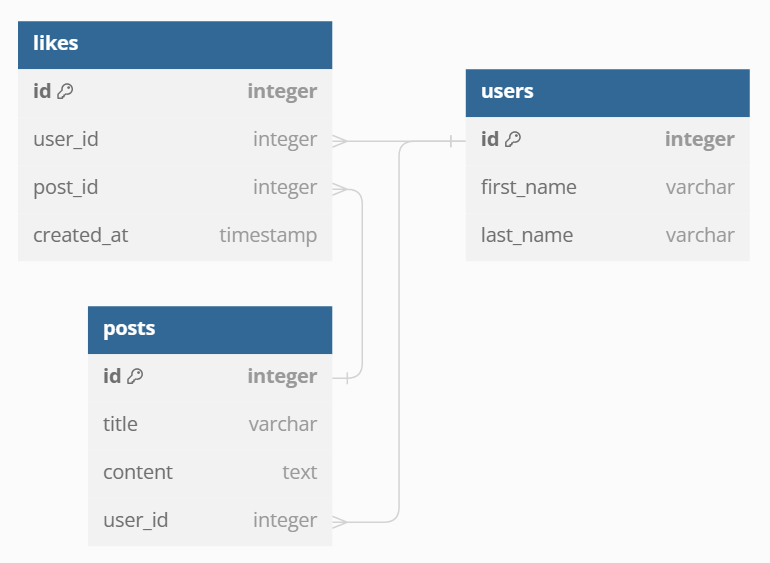

---
## 2. Retourner le top 3 des articles les plus liké.


In [32]:
query = """
SELECT posts.id, title, content, COUNT(*) as nb_likes
FROM posts JOIN likes ON posts.id = likes.post_id
GROUP BY post_id
ORDER BY COUNT(*)
DESC
LIMIT 3
"""
pd.read_sql_query(query, conn)


,id,title,content,nb_likes
0,143,Half imagine another.,Nice career practice image. Modern son per share painting successful on.,84
1,83,Side foot leader popular.,Relate parent run public choice allow. Establish single far Congress impact course offer.,82
2,99,Area paper whatever mean.,Space whose often computer. Yard account stuff section write store somebody. Coach none blue skin finish any.,81


---
## 3. Trouvez les trois utilisateurs qui ont le plus liké

In [36]:
query = """
SELECT users.id, first_name, last_name, COUNT(*) as nb_likes
FROM users JOIN likes ON users.id = likes.user_id
GROUP BY user_id
ORDER BY COUNT(*)
DESC
LIMIT 3
"""
pd.read_sql_query(query, conn)


,id,first_name,last_name,nb_likes
0,43,Michael,Allen,236
1,12,Donna,Ramirez,233
2,44,Hayley,Williams,227


---
## 4. Trouver l'auteur le plus apprécié

In [44]:
query = """
SELECT users.id, first_name, last_name, COUNT(*) as nb_likes
FROM (users JOIN posts ON users.id = posts.user_id) JOIN likes ON posts.id = likes.post_id
GROUP BY users.id
ORDER BY COUNT(*)
DESC
LIMIT 1
"""
pd.read_sql_query(query, conn)


,id,first_name,last_name,nb_likes
0,57,Teresa,Moore,647


---
## 5. Qui sont les auteurs des 3 articles les plus likés ?

In [46]:
query = """
SELECT users.id, first_name, last_name, post_id, title, content, COUNT(*) as nb_likes
FROM (users JOIN posts ON users.id = posts.user_id) JOIN likes ON posts.id = likes.post_id
GROUP BY posts.id
ORDER BY COUNT(*)
DESC
LIMIT 3
"""
pd.read_sql_query(query, conn)


,id,first_name,last_name,post_id,title,content,nb_likes
0,72,Melissa,Henry,143,Half imagine another.,Nice career practice image. Modern son per share painting successful on.,84
1,63,Cynthia,Raymond,83,Side foot leader popular.,Relate parent run public choice allow. Establish single far Congress impact course offer.,82
2,64,Alexander,Cook,99,Area paper whatever mean.,Space whose often computer. Yard account stuff section write store somebody. Coach none blue skin finish any.,81


---
## 6. Combien de personnes ont aimé au moins une publication ?

In [53]:
query = """
SELECT COUNT(*) as nb_users
FROM (
    SELECT DISTINCT users.id
    FROM users INNER JOIN likes ON users.id = likes.user_id
    )
"""
pd.read_sql_query(query, conn)


,nb_users
0,49


---
## 7. Calculez le nombre cumulé de likes par jour

In [5]:
query = """
SELECT DISTINCT created_at, COUNT(*)
OVER (ORDER BY created_at) as cumulative_likes
FROM likes
ORDER BY created_at
"""
pd.read_sql_query(query, conn)


,created_at,cumulative_likes
0,2019-01-01,24
1,2019-01-02,58
2,2019-01-03,98
3,2019-01-04,134
4,2019-01-05,161
...,...,...
331,2019-12-24,9882
332,2019-12-25,9915
333,2019-12-26,9947
334,2019-12-27,9970


---
## 8. (Optional) Qui est le(s) plus grand(s) fan(s) de chaque auteur ?

<p>
Le ou les plus grands fans d'un auteur sont définis comme le ou les utilisateurs qui ont le plus aimé les publications de l'auteur. c'est-à-dire que s'il y a égalité entre les fans qui ont tous deux aimé un auteur 20 fois, les deux fans doivent être renvoyés avec leur nombre de likes et l'auteur en question.</p>

<p>Indice : Vous pouvez utiliser <code>WITH</code></p>